# NB3.1 K Nearest Neighbors

K Nearest Neighbors (KNN) is a machine learning algorithm which uses the training dataset directly to make predictions.

In order to make prediction for new data points, KNN identifies the *k* most similar instances from tje entire training set and summarizes the output variable for those *k* instances.

In classification, the predicted value is deternined by the majority class (mode) of the *k* most similar instances. For regression, it could be the mean of the output varible or a weighted mean where each neighbor contributes based on how close is to the new data point.

**NB3.1 K Nearest Neighbors** is divided in two sections:
* KNN Classifier. In this section you will implement KNN as classifier and use it to classify flowers from the Iris Dataset. 
* KNN Regresor. In this section you use the scikit-learn implementation of KNN as regressor to predict the value of Boston houses from the Boston House Pricing Dataset. 

Additionally, you will learn how to use the scikit-learn implementation of the algorithm.

## KNN Classifier

### A. Implementation

The implementation of the KNN Classifier of this activity will be done by using an Object Oriented Programming style. Consider the following structure:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [2]:
class KNNClassifier:
    """
    Class for the algorithm KNN classifier
    
    Parameters:
    k: number of K-neighbors to use in the algorithm           
    distance: type of distance used in the algorithm
    
    Attributes:
    self.k: saves the parameter k
    self.distance: sves the parameter distance
    self.Xdata: saves the data to use in the algorithm
    self.Ydata: saves the target to use in the algorithm
    
    """
    def __init__(self, k = 3, distance = 'euclidean'):
        """
        class initializer
        
        Input:
        
        k: number of K-neighbors to use in the algorithm           
        distance: type of distance used in the algorithm
        
        Output:
        return nothing
        """
        
        self.k = k
        self.distance = distance
        self.Xdata = None
        self.Ydata = None
    
    
    def fit(self, XTrain, YTrain):
        """
        function to fit the algorithm, but only saves the XTrain and YTrain in two attributes
        to use later on
        
        Input:
        XTrain: data of X
        YTrain: target data
        
        Output:
        return nothing
        """
        self.Xdata = np.array(XTrain)
        self.Ydata = np.array(YTrain)
        
    
    def predict(self, XTest):
        """
        Function to predict the class of the given values
        
        Input:
        XTest. lists of lists containing the information to predict the class
        
        Output:
        return an array of the class prediction for the given XTest
        """
        #list to save the predictions
        prediction = []
        #transforming to a numpy array to ease the computing
        XTest = np.array(XTest)
        
        #iterating for each row of XTest
        for row_test in XTest:

            #getting the closest K-neighbors
            Neighbors = self._getNeighbors(row_test)

            #getting the unique classes of the data
            unicos = np.unique(self.Ydata)

            #dictionary to use later on, to compute the average distance
            distance_avg = {key:0 for key in unicos}

            #counter for the number of classes for each neighbor
            counter = [0 for i in unicos]

            #iterating in each neighbors
            for idx, distance in Neighbors:
                
                #getting the position of the class of the neihgbor in the unique list
                position = list(unicos).index(self.Ydata[idx])
                
                #saving the distance in its respective key
                distance_avg[unicos[position]] += distance

                #adding the appearance of the class of that neighbor
                counter[position] += 1
                
                
            #auxiliar to check if there are more than one class with the maximum of appearence
            #which means the row_test could be classified for both of those classes, so now we check the avg distance
            aux = [index for index, value in enumerate(counter) if value == max(counter)]
            #case there are more than 1 class
            if len(aux) > 1:
                #initializing variables
                temp = float("inf")
                index = ""
                #going through each index on auxiliar
                for idx in aux:
                    #checking if the avg distance of those object of one class is less than the avg of the previous class
                    if distance_avg[unicos[idx]]/counter[idx] < temp:
                        temp = distance_avg[unicos[idx]] / counter[idx]
                        
                        #saving the index
                        index = idx
                    else:
                        pass
                prediction.append(unicos[index])
            else:
                #adding the class prediction for that row
                prediction.append( unicos[counter.index(max(counter))] )
                

        return prediction
            
        
        
        
        
    def _getNeighbors(self, Xrow):
        """
        Function to get the K closest neighbors to a given point
        
        Input:
        Xrow: list of values, to compute the distance
        
        Output:
        return the K-closest neighbors using the distance of the self.distance
        """
        #declaring variables
        values = []
        idx = 0
        
        #getting the distance for each value in XTrain
        for XTrain_row in self.Xdata:
            values.append([idx, self._distance(XTrain_row, Xrow)])
            #index of the Xtrain_row
            idx += 1
            
        #sorting the list according to the distance
        if self.distance == "cosine":
            sorted_list = sorted(values, key=itemgetter(1), reverse = True)
        
            return sorted_list[0:self.k]
            
        else:
            sorted_list = sorted(values, key=itemgetter(1), reverse = False)
            
            print(sorted_list)
        
            return sorted_list[0:self.k]
    
    
    
    def _distance(self, Xrow1, Xrow2):
        """
        function to choose the correct distance function
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the distance
        
        Output:
        return the distance
        """
        if self.distance == "euclidean":
            return self._EuclideanDistance(Xrow1,Xrow2)
        
        elif self.distance == "manhattan":
            return self._ManhattanDistance(Xrow1,Xrow2)
        
        elif self.distance == "chebyshev":
            return self._ChebyshevDistance(Xrow1,Xrow2)
        
        elif self.distance == "cosine":
            return self._CosineSimilarity(Xrow1,Xrow2)
        
        elif self.distance == "hamming":
            return self._HammingDistance(Xrow1,Xrow2)
        
        else:
            raise Exception("The distance you wrote is incorrect")
            
        
    
    def _EuclideanDistance(self, Xrow1, Xrow2):       
        """
        Function to compute the Euclidean Distance
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the distance
        
        Output:
        return the Euclidean distance 
        """
        Distance = np.sqrt(sum(np.square(Xrow1 - Xrow2)))
        
        return Distance
    
    def _ManhattanDistance(self, Xrow1, Xrow2):       
        """
        Function to compute the Manhattan Distance
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the distance
        
        Output:
        return the Manhattan distance 
        """
        Distance = sum(np.abs(Xrow1-Xrow2))
        return Distance
    
    def _ChebyshevDistance(self, Xrow1, Xrow2):      
        """
        Function to compute the Chebyshev Distance
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the distance
        
        Output:
        return the Chebyshev distance 
        """
        Distance = max(np.abs(Xrow1-Xrow2))
        return Distance

    def _CosineSimilarity(self, Xrow1, Xrow2):     
        """
        Function to compute the Cosine Similarity
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the Cosine similarity
        
        Output:
        return the Cosine Similarity 
        """
        Numerator = sum(Xrow1 * Xrow2)
        DenominadorA = np.sqrt(sum(Xrow1 * Xrow1))
        DenominadorB = np.sqrt(sum(Xrow2 * Xrow2))
        return Numerator/(DenominadorA * DenominadorB)

    def _HammingDistance(self, Xrow1, Xrow2):      
        """
        Function to compute the Hamming Distance
        
        Input:
        Xrow1, Xrow1: lists containing the values to compute the distance
        
        Output:
        return the Hamming distance 
        """
        suma = 0
        for value1, value2 in zip(Xrow1, Xrow2):
            if len(str(value1)) != len(str(value2)):
                raise Exception("The strings has not the same lenghts")
            else:
                if str(value1) == str(value2):
                    suma+=1
                    
        return suma
            

        

Complete the following task by implementing the functions. You can create "private" methods and attributes.

**T1.** Complete the function `KNNClassifier.fit(self, XTrain, YTrain)`. The function should `XTrain` and `YTrain` into `self.XData` and `self.YData`, respectively. The function should not return any value.

**T2.** Complete the following functions which compute the distance metrics between two instances (`Xrow1`, `Xrow2`) by different approaches:
* `_EuclideanDistance(self, Xrow1, Xrow2` which computes the euclidean distance between Xrow1 and Xrow2.
* `_ManhattanDistance(self, Xrow1, Xrow2)` which computes the manhattan distance between Xrow1 and Xrow2.
* `_ChebyshevDistance(self, Xrow1, Xrow2)` which computes the chebishev distance between Xrow1 and Xrow2.
* `_CosineSimilarity(self, Xrow1, Xrow2)` which computes the cosine similarity between Xrow1 and Xrow2.
* `_HammingDistance(self, Xrow1, Xrow2)`which computes the hamming distance between Xrow1 and Xrow2.

**T3.** Complete the function `_getNeighbors(self, Xrow)` which should return the index of the `self.k` nearest neighbors to `Xrow`given the `self.distance` metric. Select the appropiate distance metric function to be used given the `self.distance`. Consider the following values: 'euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming'.

**T4.** Complete the function `predict(self, XTest)` which should return the predicted values for all instances in `XTest` according to `self.k` and `self.distance`.

### B. Iris Data

The Iris Dataset is one of the most known in the literature. This dataset has 50 instances of three different types of the plant Iris: Iris Versicolor, Iris Setosa and Iris Virginica (Fig. 1).

![IrisPlanta](./Images/Iris1.png)
*Figure 1. There are three types of the plant Iris: Versicolor, Setosa y Virginica. Image retrieved from [[1](https://www.datacamp.com/community/tutorials/machine-learning-in-r)]*

The attributes in the dataset are the length and width of the petal and sepal (Fig. 2).

![IrisPlanta](./Images/Iris2.png)
*Figura 2. Attributes in the Iris Dataset. Image R'retrieved from [[2](https://bishwamittra.github.io/imli.html)]*

The common goal is to predict the type of plant based on the features. One of the classes is linearly separable but the rest are not [[3](https://archive.ics.uci.edu/ml/datasets/iris)].

In [3]:
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF["target"] = iris.target

In [4]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**T5.** In order to validate the implementation in *Part A*, some preprocessing steps are needed to improve the performance of the KNN Model. Complete the following.
* Use the StandardScaler (`sklearn.preprocessing.StandardScaler`) to standardize the features.
* Perform a stratified split of data (70% Train and 30% Test) into a Train and Test set. You can use `sklearn.model_selection.train_test_split`. Do not forget to set correctly the parameter `stratify`. You should split the data in a stratified way, using the target variable.

In [5]:
scaler = StandardScaler()
irisDF[iris.feature_names] = scaler.fit_transform(irisDF[iris.feature_names])

In [6]:
iris_data = irisDF[iris.feature_names]
iris_target = irisDF["target"]

In [7]:
data_train, data_test, target_train, target_test = train_test_split(iris_data,iris_target, train_size = .7, stratify = iris_target, 
                                                                    random_state = 1)

**T6.** Complete the following:
* Create a `KNNClassifier` with `k = 5` and `distance = 'euclidean`.
* Fit the model with the trainning set.
* Predict the values of the test set.
* Create a new dataframe with the following columns: *y_real* and *y_predicted* for the test set.

In [8]:
KNN = KNNClassifier(k = 5, distance = "euclidean")

In [9]:
KNN.fit(data_train,target_train)

In [10]:
predicted_y = KNN.predict(data_test)

[[25, 0.21196852870537594], [85, 0.5032674073707344], [2, 0.5233730115255355], [3, 0.720010025999465], [84, 0.7274027808492006], [90, 0.9062361910894482], [5, 0.9349894575840679], [69, 0.9452886491934723], [38, 0.985924877310077], [28, 1.0242063347281316], [61, 1.0813977609432348], [95, 1.1080668356303602], [73, 1.1249995898186842], [48, 1.1901218367082016], [34, 1.2066685462487317], [22, 1.2811279410239746], [88, 1.336242194979947], [99, 1.3749004252232508], [57, 1.3812059140992123], [74, 1.4130235166828737], [35, 1.431298904674332], [49, 1.4529901883687182], [29, 1.4795160553788613], [62, 1.493184863849189], [59, 1.5446709426309315], [20, 1.5675246068605713], [75, 1.5725048863100353], [36, 1.598156670964039], [71, 1.6595452317990689], [26, 1.7032994985497973], [42, 1.7493844568851449], [40, 1.767811298586101], [15, 1.771369640359276], [66, 1.771369640359276], [72, 1.7770972357455712], [8, 1.79352350321964], [93, 1.8569751314649534], [9, 1.870594819176456], [79, 1.8797240815892464], [

In [11]:
new_irisDF = pd.DataFrame(data_test.copy())
new_irisDF["y_real"] = target_test
new_irisDF["y_predicted"] = predicted_y

In [12]:
new_irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_real,y_predicted
148,0.432165,0.788808,0.933271,1.448832,2,2
5,-0.537178,1.939791,-1.169714,-1.052180,0,0
6,-1.506521,0.788808,-1.340227,-1.183812,0,0
106,-1.143017,-1.282963,0.421734,0.659038,2,1
75,0.916837,-0.131979,0.364896,0.264142,1,1


The confusion matrix is one of the most common tools for the evaluation of classification models.

**T7.** Implement the functions `ConfusionMatrix(y_real, y_predicted)` and `Accuracy(y_real, y_predicted)`. The first function should return the confusion matrix given the predicted and real values of the target variable. The second function should return the accuracy given the predicted and real values of the target variable. Use your functions to evaluate the model obtained in **T6**.

In [13]:
def ConfusionMatrix(y_real, y_predicted):
    """    
    function to compute the Confusion Matrix
        
    Input:
    y_real: real values of target variable of the data
    y_predicted: predicted values of target variable of the data
        
    Output:
    return the confusion matrix
    
    """
    #transforming to numpy arrays to ease everything
    y_real = np.array(y_real)
    y_predicted = np.array(y_predicted)
    
    #getting the unique classes
    unicos = np.unique(y_real)
    
    #initialiing the confusion matrix
    confunsion_matrix = [[0 for j in unicos] for _ in unicos]
    
    #auxiliar counter
    count = 0
    #going through each row of each class
    for i in range(len(unicos)):
        for value1, value2 in zip(y_real, y_predicted):
            if value1 == unicos[i]:
                if value1 == value2:
                    confunsion_matrix[i][count] += 1
                else:
                    aux = list(unicos).index(value2)
                    
                    confunsion_matrix[i][aux] += 1
                    
        count += 1
    return np.array(confunsion_matrix)

In [14]:
ConfusionMatrix(new_irisDF.y_real, new_irisDF.y_predicted)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]])

In [15]:
def Accuracy(y_real, y_predicted):
    """    
    Function to compute the accuracy of the model using the confusion matrix
        
    Input:
    y_real: real values of target variable of the data
    y_predicted: predicted values of target variable of the data
        
    Output:
    return the accuracy
    """
    confusion_result = ConfusionMatrix(y_real, y_predicted)
    
    #np.trace what it does, it is the su of the values of the diagonal of a matrix
    return np.trace(confusion_result)/np.sum(confusion_result)

In [16]:
Accuracy(new_irisDF.y_real, new_irisDF.y_predicted)

0.9333333333333333

**T8.** Make a plot of the *accuracy* as a function of k for different KNN models (k = [1,10]). Which is the most appropiate value of k?

In [17]:
accuracy_list = []

for K in range(1,11):
    KNN_plot = KNNClassifier(k = K, distance = "euclidean")
    KNN_plot.fit(data_train,target_train)
    predicted_y = KNN_plot.predict(data_test)
    accuracy_list.append(Accuracy(target_test, predicted_y))

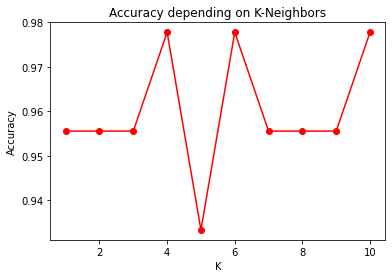

In [18]:
x_axis = list(range(1,11))


plt.plot(x_axis, accuracy_list, color = 'red', marker = "o")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy depending on K-Neighbors")
plt.show()

#### The most appropriate value of k:
By looking at the graph above, we manage to notice how the accuracy score seems to improve, the larger the value of k. A small value of k means that noise will have a higher influence on the result and a large value will make it computationally expensive. For this specific dataset, we would choose 10 given the fact that 4, 6 and 10 all share the same accuracy score. But if we wanted to save some computational budget, we would probably work with a k value of 4.

### C. Scikit-Learn KNNClassifier

Scikit-Learns implements a KNNClassifier Model [[4](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)] which learning is based on the *k* nearest neighbors of each query point, where *k* is an integer value to be specified by the user.

Here are some interesting parameters to consider during modelling creation:
* n_neighbors: Number of neighbors to use.
* weights: {'uniform', 'distance'}: Weight function used in prediction. Observe that when 'distance' is used, weight points by the inverse of their distance.
* algorithm: Algorithm used to compute the nearest neighbors. In the *part A*, it is probable that you implemented a brute-force search. 

**T9.** Complete the following modelling steps by using the datasets created in **T5** (`data_train`, `data_test`, `target_train`, `target_test`):
* Create a KNeighborsClassifier Model with 5 number of neighbors and 'distance' as the value of the `weights`parameter.
* Fit the data to the train set.
* Predict the values of the test set.
* Create a new dataframe with the following columns: *y_real* and *y_predicted* for the test set.
* Obtain the confusion matrics by using `metrics.confusion_matrix`[[5](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)]

In [19]:
# Create your KNN model here
KNN_sk = KNeighborsClassifier(n_neighbors = 5, weights = "distance")

In [20]:
# Fit the data to the train set here
KNN_sk.fit(data_train, target_train)

KNeighborsClassifier(weights='distance')

In [21]:
# Predict the values of the test set her
sk_predicted_y = KNN_sk.predict(data_test)

In [22]:
# Create a new dataframe with 'y_real' and 'y_predicted'
sk_irisDF = pd.DataFrame(data_test.copy())
sk_irisDF["y_real"] = target_test
sk_irisDF["y_predicted"] = sk_predicted_y

In [23]:
# Obtain the confusion matrix here
confusion_matrix = metrics.confusion_matrix(sk_irisDF.y_real, sk_irisDF.y_predicted)
confusion_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

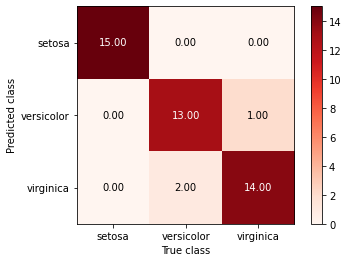

In [24]:
# After obtaining the `confusion_matrix` in the las cell
# execute this cell to print it into a graphical way.

corr_im = plt.imshow(confusion_matrix, cmap="Reds", vmin=0)
corr_cbar = plt.colorbar(corr_im)

corr_array = corr_im.get_array()
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        cell_value = corr_array[i][j]
        if cell_value > 0.5*np.max(confusion_matrix):
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(i, j, '{:.2f}'.format(cell_value), color=text_color, ha='center', va='center')

plt.xticks(ticks=range(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=range(len(iris.target_names)), labels=iris.target_names)

plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.show()

**T10.** Select the appropiate number of *k* by training and evaluating several KNeighborsClassifier Models. This time evaluate each model by using `sklearn.model_selection.cross_val_score` [[6](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)]. Use the accuracy to evaluate the model.

Print the confusion matrix and accuracy for a model trained with the best value of *k*.

In [25]:
best_k = 0
aux = float("-inf")
for K in range(1,11):
    
    KNN_classifier = KNeighborsClassifier(n_neighbors = K, weights = "distance")

    temp = np.mean(cross_val_score(KNN_classifier, iris_data, iris_target, n_jobs = -1, scoring = "accuracy"))
    if temp > aux:
        best_k = K
        aux = temp
        
print("Best K: ", best_k)

Best K:  6


In [26]:
KNN_classifier = KNeighborsClassifier(n_neighbors = best_k, weights = "distance")
KNN_classifier.fit(data_train, target_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [27]:
# Predict the values of the test set 
KNN_predicted_y = KNN_classifier.predict(data_test)

In [28]:
# Create a new dataframe with 'y_real' and 'y_predicted'
KNN_irisDF = pd.DataFrame(data_test.copy())
KNN_irisDF["y_real"] = target_test
KNN_irisDF["y_predicted"] = KNN_predicted_y

In [29]:
Accuracy(KNN_irisDF.y_real, KNN_irisDF.y_predicted)

0.9777777777777777

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(KNN_irisDF.y_real, KNN_irisDF.y_predicted)

0.9777777777777777

In [31]:
# Obtain the confusion matrix here
confusion_matrix = metrics.confusion_matrix(KNN_irisDF.y_real, KNN_irisDF.y_predicted)
confusion_matrix

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

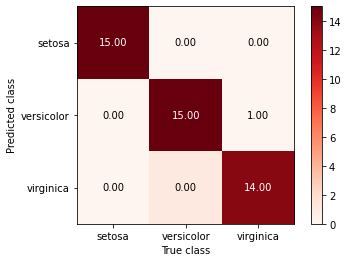

In [32]:
# After obtaining the `confusion_matrix` in the las cell
# execute this cell to print it into a graphical way.

corr_im = plt.imshow(confusion_matrix, cmap="Reds", vmin=0)
corr_cbar = plt.colorbar(corr_im)

corr_array = corr_im.get_array()
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        cell_value = corr_array[i][j]
        if cell_value > 0.5*np.max(confusion_matrix):
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(i, j, '{:.2f}'.format(cell_value), color=text_color, ha='center', va='center')

plt.xticks(ticks=range(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=range(len(iris.target_names)), labels=iris.target_names)

plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.show()

# KNN Regressor

Consider the Boston Housing Data [[7](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)]. It contains information collected by the U.S. Census Service concerning housing in the area of Boston Mass. 

In [33]:
boston = datasets.load_boston()

In [34]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF["PRICE"] = boston.target

In [35]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Scikit-Learn implements a regressor based on k-nearest neighbors (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). The parameters of the model are similar to the one reviewed in the last section.

**T11.** In order to make the prediction of the , some preprocessing steps are needed to improve the performance of the KNN Model. Complete the following:
* Use the StandardScaler (`sklearn.preprocessing.StandardScaler`) to standardize the features.
* Perform a stratified split of data (70% Train and 30% Test) into a Train and Test set. You can use `sklearn.model_selection.train_test_split`.

In [36]:
boston_scaler = StandardScaler()
bostonDF[boston.feature_names] = boston_scaler.fit_transform(bostonDF[boston.feature_names])

In [37]:
boston_data = bostonDF[boston.feature_names]
boston_target = bostonDF["PRICE"]

### Note: stratified split does not work, gives a error

In [38]:
data_train_b, data_test_b, target_train_b, target_test_b = train_test_split(boston_data,boston_target, 
                                                                            train_size = .7, random_state = 1)

**T12.** Fit the best KNeighborsRegressor considering `n_neighbors`and `weights`('uniform' and 'distance') has hyperparameters. Use cross validation (`cross_val_score`) to evaluate the model and RMSE as the evaluation metric.

Justify your selection by presenting two plots of 'RMSE' as a function of 'k'. One plot should correspond to models with 'uniform' weights and the second one with 'distance' weights.

### Note: The best k it changes depending on if you pass the full dataset or just the train dataset, if you pass the train data, the best k it will be 3; however, we passed the full dataset because we read in various mediums and examples, that in cross validation the best is to pass the full dataset

In [39]:
k_list = list(range(1,11))
rmse_values_distance = []

for K in k_list:
    
    KNN_regressor = KNeighborsRegressor(n_neighbors = K, weights = "distance")

    temp = np.mean(-1 * cross_val_score(KNN_regressor, boston_data, boston_target, n_jobs = -1, scoring = "neg_root_mean_squared_error"))
    rmse_values_distance.append(temp)

In [40]:
rmse_values_uniform = []

for K in k_list:
    
    KNN_regressor = KNeighborsRegressor(n_neighbors = K, weights = "uniform")

    temp = np.mean(-1 * cross_val_score(KNN_regressor, boston_data, boston_target, n_jobs = -1, scoring = "neg_root_mean_squared_error"))
    rmse_values_uniform.append(temp)

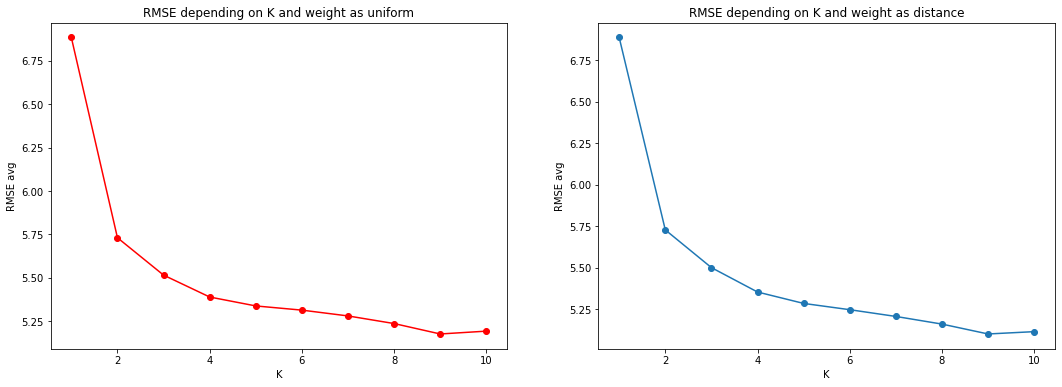

In [41]:
fig, ax = plt.subplots(1,2, figsize = (18,6))

ax[0].plot(k_list, rmse_values_uniform, color = "red", marker = "o")
ax[0].set_title("RMSE depending on K and weight as uniform")
ax[0].set_xlabel("K")
ax[0].set_ylabel("RMSE avg")

ax[1].plot(k_list, rmse_values_distance, marker = "o")
ax[1].set_title("RMSE depending on K and weight as distance")
ax[1].set_xlabel("K")
ax[1].set_ylabel("RMSE avg")
plt.show()

In both plots, it is easy to notice how the best K is equal to 9 because in both weights, distance and uniform, is the best K, and with a remarkable difference. 

In [42]:
KNN_regressor_final = KNeighborsRegressor(n_neighbors = 9, weights = "distance")
KNN_regressor_final.fit(data_train_b, target_train_b)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [43]:
y_predicted_boston = KNN_regressor_final.predict(data_test_b)

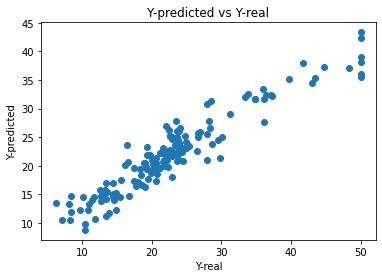

In [44]:
plt.scatter(target_test_b, y_predicted_boston)
plt.title("Y-predicted vs Y-real")
plt.xlabel("Y-real")
plt.ylabel("Y-predicted")
plt.show()